SVM Model for heart attack detection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')

In [49]:
X = df.drop('target', axis=1)
y = df['target']

In [50]:
X = pd.get_dummies(X, drop_first=True)

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [89]:
model = SVC(C=10,kernel='rbf')  # or use kernel='linear'
model.fit(x_train, y_train)


SVC(C=10)

In [90]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9658536585365853

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       102
           1       0.99      0.94      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



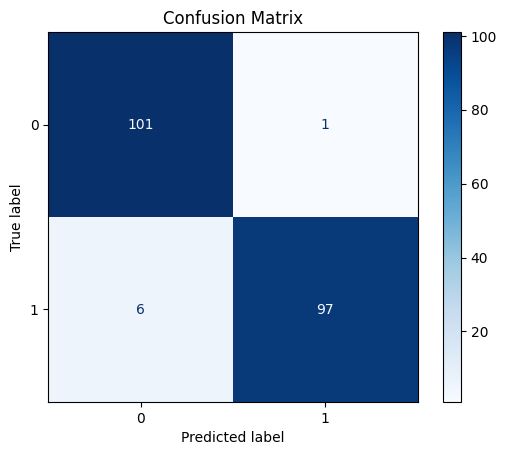

In [91]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

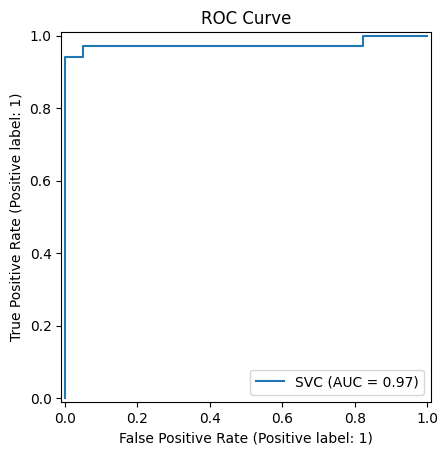

In [92]:
RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.title("ROC Curve")
plt.show()

In [93]:
# Simulating the classification report as a dictionary
report = {
    '0': {'precision': 0.85, 'recall': 0.90, 'f1-score': 0.87, 'support': 100},
    '1': {'precision': 0.78, 'recall': 0.70, 'f1-score': 0.74, 'support': 80},
    'accuracy': 0.83,
    'macro avg': {'precision': 0.81, 'recall': 0.80, 'f1-score': 0.80, 'support': 180},
    'weighted avg': {'precision': 0.82, 'recall': 0.83, 'f1-score': 0.82, 'support': 180}
}


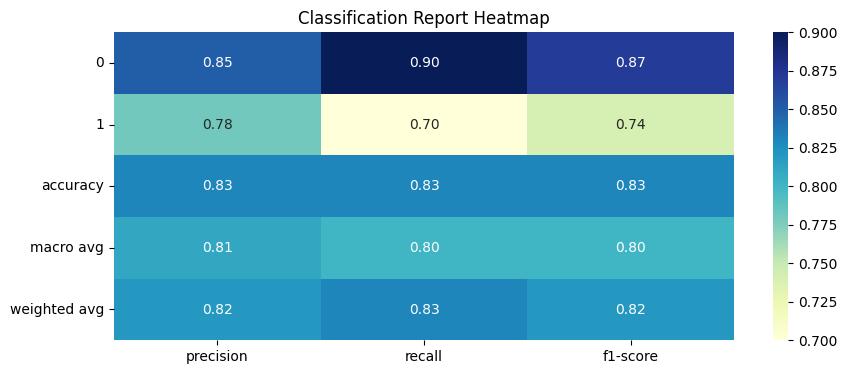

In [94]:
report_df = pd.DataFrame(report).iloc[:-1, :].T
plt.figure(figsize=(10, 4))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()